In [1]:
import keras


In [3]:
import tensorflow


In [ ]:
1. Dataset:

In [1]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 38s 0us/step


In [ ]:
2. Explore and Analyze the Dataset:

In [2]:
# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Check the number of classes
num_classes = len(set(y_train.flatten()))
print("Number of classes:", num_classes)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 10


In [ ]:
 Data Preprocessing:

In [3]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
Split the Dataset:

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
Neural Network Architecture:

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 125s 97ms/step - loss: 1.5691 - accuracy: 0.4264 - val_loss: 1.3515 - val_accuracy: 0.5238
Epoch 2/10
1250/1250 [==============================] - 113s 90ms/step - loss: 1.2028 - accuracy: 0.5714 - val_loss: 1.1535 - val_accuracy: 0.6038
Epoch 3/10
1250/1250 [==============================] - 144s 115ms/step - loss: 1.0445 - accuracy: 0.6319 - val_loss: 1.0228 - val_accuracy: 0.6448
Epoch 4/10
1250/1250 [==============================] - 138s 110ms/step - loss: 0.9453 - accuracy: 0.6702 - val_loss: 0.9692 - val_accuracy: 0.6582
Epoch 5/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.8711 - accuracy: 0.6936 - val_loss: 0.9290 - val_accuracy: 0.6796
Epoch 6/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.8063 - accuracy: 0.7164 - val_loss: 0.9422 - val_accuracy: 0.6740
Epoch 7/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.7534 - accuracy: 0.7344 - val_los

In [ ]:
8. Monitor Training Process:

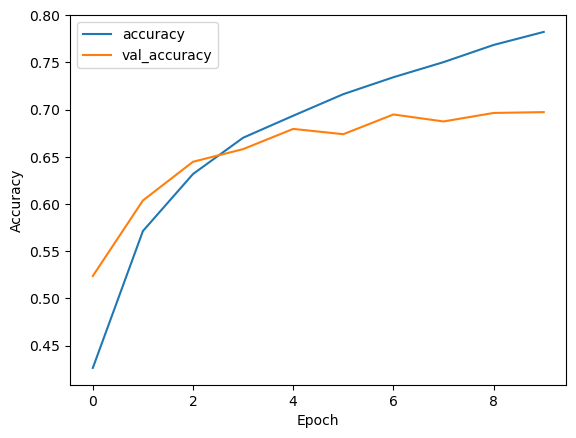

In [7]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# #2 Model Evaluation:
1. Evaluate the Trained Model:

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


313/313 [==============================] - 7s 24ms/step - loss: 0.9200 - accuracy: 0.6980
Test Accuracy: 69.80%


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


313/313 [==============================] - 8s 24ms/step


NameError: name 'np' is not defined

In [ ]:
2. Visualizations:

In [ ]:
import seaborn as sns

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize ROC curve (if binary classification)
# For multi-class, you can use a one-vs-all approach or micro/macro averaging


In [ ]:
Fine-Tuning and Optimization:

Epoch 1/10
1250/1250 [==============================] - 151s 115ms/step - loss: 1.6922 - accuracy: 0.3776 - val_loss: 1.4522 - val_accuracy: 0.4829
Epoch 2/10
1250/1250 [==============================] - 101s 81ms/step - loss: 1.3219 - accuracy: 0.5290 - val_loss: 1.1839 - val_accuracy: 0.5798
Epoch 3/10
1250/1250 [==============================] - 131s 105ms/step - loss: 1.1847 - accuracy: 0.5834 - val_loss: 1.0836 - val_accuracy: 0.6224
Epoch 4/10
1250/1250 [==============================] - 122s 98ms/step - loss: 1.0930 - accuracy: 0.6170 - val_loss: 1.0282 - val_accuracy: 0.6418
Epoch 5/10
1250/1250 [==============================] - 136s 108ms/step - loss: 1.0228 - accuracy: 0.6429 - val_loss: 1.0025 - val_accuracy: 0.6480
Epoch 6/10
1250/1250 [==============================] - 146s 116ms/step - loss: 0.9600 - accuracy: 0.6648 - val_loss: 0.9211 - val_accuracy: 0.6802
Epoch 7/10
1250/1250 [==============================] - 131s 104ms/step - loss: 0.9091 - accuracy: 0.6822 - val_lo

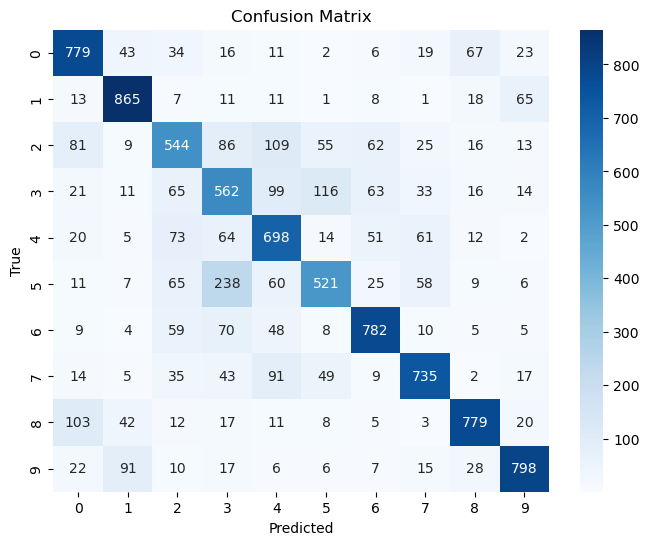

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a simple CNN model with dropout
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten layer
model.add(Flatten())

# Dense layers with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes.numpy()))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred_classes.numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Predicting House Prices with Neural Networks

In [ ]:
Dataset

In [ ]:
Data Exploration and Preprocessing: